In [17]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Use sep='\t' to specify tab separation
  df = pd.read_csv(fn, sep='\t')

Saving Restaurant_Reviews-2.tsv to Restaurant_Reviews-2 (3).tsv
User uploaded file "Restaurant_Reviews-2 (3).tsv" with length 61332 bytes


In [19]:
# Exploring the restaurant reviews dataset
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [20]:
df.shape

(1000, 2)

In [21]:
df.dtypes

,0
Review,object
Liked,int64


In [22]:
df.isnull().sum()

,0
Review,0
Liked,0


**Custom NER Model**

In [23]:
df = pd.read_csv("Restaurant_Reviews-2.tsv", sep="\t")
sample_df = df.head(500)
sample_df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [24]:
# since we need only text data, we wil take teh 'Review' column of sample_df and convert it to text file
sample_df['Review'].to_csv("sample_data.txt", index=False, header=False)

In [25]:
# downloading the text file created
from google.colab import files
files.download("sample_data.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
uploaded = files.upload()

Saving sample_data.txt to sample_data (3).txt


In [27]:
!pip install spacy
!python -m spacy download en_core_web_lg

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_lg-3.8.0/en_core_web_lg-3.8.0-py3-none-any.whl (400.7 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
import spacy
from spacy import displacy
from spacy.training import Example
from __future__ import unicode_literals, print_function
import os, time, json, base64
from pathlib import Path
from tqdm import tqdm
from spacy.training import Example
from spacy import displacy

In [29]:
nlpSpacy = spacy.load("en_core_web_lg")
print(nlpSpacy.pipe_names)


['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [30]:
file = open('sample_data.txt')
text = file.read()
file.close()
doc = nlpSpacy(text)
displacy.render(doc, style="ent", jupyter=True)

In [31]:
for entity in doc.ents:
    print(f"Name of the entity {entity.text} type is {entity.label_}")

Name of the entity Rick Steve type is PERSON
Name of the entity Cape Cod type is LOC
Name of the entity Vegas type is GPE
Name of the entity Mexican type is NORP
Name of the entity an hour type is TIME
Name of the entity Luke type is PERSON
Name of the entity 23 type is CARDINAL
Name of the entity first type is ORDINAL
Name of the entity Hiro type is PERSON
Name of the entity Frozen type is PRODUCT
Name of the entity Firehouse type is ORG
Name of the entity Greek type is NORP
Name of the entity Greek type is NORP
Name of the entity Vegas type is GPE
Name of the entity 5 type is CARDINAL
Name of the entity 10 minutes type is TIME
Name of the entity APPETIZERS type is ORG
Name of the entity Dos Gringos type is NORP
Name of the entity second type is ORDINAL
Name of the entity 5 type is CARDINAL
Name of the entity 2 type is CARDINAL
Name of the entity Jeff type is PERSON
Name of the entity 30 min type is QUANTITY
Name of the entity Excalibur type is ORG
Name of the entity 2 type is CARDINA

**Custom Spacy NER model**

In [39]:
from google.colab import files

In [41]:
# I have created 6 labels manually which are : 'RESTAURANT', 'RESTAURANT TYPES', 'PRICE', 'QUALITY', 'AMBIENCE', 'SERVICE'

with open('/content/annotations.json', 'r') as f:
    data = json.load(f)

print(data['annotations'][0])
data['classes']

['Wow... Loved this place.', {'entities': [[7, 23, 'AMBIENCE']]}]


['RESTAURANT', 'RESTAURANT TYPES', 'PRICE', 'QUALITY', 'AMBIENCE', 'SERVICE']

In [42]:
# Creating an empty model

training_data = data.copy()
training_data['classes'] = data['classes']
training_data['annotations'] = []
for text, annotation in data['annotations']:
    try:
        if text != "" and len(annotation['entities']) > 0:
            temp_dict = {}
            temp_dict['text'] = text
            temp_dict['entities'] = []
            for ent in annotation['entities']:
                start = ent[0]
                end = ent[1]
                label = ent[2].upper()
                temp_dict['entities'].append((start, end, label))
            training_data['annotations'].append(temp_dict)
    except:
        pass

print(training_data)

{'classes': ['RESTAURANT', 'RESTAURANT TYPES', 'PRICE', 'QUALITY', 'AMBIENCE', 'SERVICE'], 'annotations': [{'text': 'Wow... Loved this place.', 'entities': [(7, 23, 'AMBIENCE')]}, {'text': 'Crust is not good.', 'entities': [(9, 18, 'QUALITY')]}, {'text': 'Not tasty and the texture was just nasty.', 'entities': [(0, 9, 'QUALITY'), (35, 41, 'QUALITY')]}, {'text': 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.', 'entities': [(78, 87, 'QUALITY')]}, {'text': 'The selection on the menu was great and so were the prices.', 'entities': [(21, 59, 'PRICE')]}, {'text': 'Now I am getting angry and I want my damn pho.', 'entities': [(17, 46, 'SERVICE')]}, {'text': "Honeslty it didn't taste THAT fresh.)", 'entities': [(12, 36, 'QUALITY')]}, {'text': 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.', 'entities': [(4, 29, 'QUALITY')]}, {'text': 'The fries were great too.', 'entities': [(5, 20, 'QUA

In [43]:
# Configuration variables

modelSpacy = None
n_iter = 100

In [44]:
# Loading the model

if modelSpacy is not None:
    nlp = spacy.load(modelSpacy)
    print("Loaded model '%s'" % modelSpacy)
else:
    nlp = spacy.blank('en')
    print("Created blank 'en' model")

Created blank 'en' model


In [45]:
# Set up pipeline

if 'ner' not in nlp.pipe_names:
    ner = nlp.add_pipe('ner')
else:
    ner = nlp.get_pipe('ner')

In [46]:
# Train the NER model

# getting all the entities
for annotations in training_data["annotations"]:
    for ent in annotations['entities']:
        ner.add_label(ent[2])

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        losses = {}
        for text, annotations in tqdm(data["annotations"]):
            try:
                if text!="":
                    example = Example.from_dict(nlp.make_doc(text), annotations)
                    #Update the model
                    nlp.update(
                        [example],
                        drop=0.5,
                        sgd=optimizer,
                        losses=losses)
            except:
                pass
        print(losses)


  1%|▏         | 7/501 [00:00<00:07, 62.37it/s]/usr/local/lib/python3.12/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "The fries were great too." with entities "[[5, 20, 'QUALITY']]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
  6%|▌         | 28/501 [00:00<00:07, 62.34it/s]/usr/local/lib/python3.12/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text ""Took an hour to get our food only 4 tables in res..." with entities "[[1, 13, 'SERVICE'], [30, 57, 'AMBIENCE'], [62, 79...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
  7%|▋         | 35/501 [00:00<00:07, 59.06it/s]/usr/local/lib/python3.12/dist-package

{'ner': np.float32(1232.3007)}


100%|██████████| 501/501 [00:08<00:00, 59.21it/s]


{'ner': np.float32(1068.1842)}


100%|██████████| 501/501 [00:09<00:00, 55.34it/s]


{'ner': np.float32(1072.1439)}


100%|██████████| 501/501 [00:09<00:00, 54.82it/s]


{'ner': np.float32(1005.3801)}


100%|██████████| 501/501 [00:09<00:00, 54.47it/s]


{'ner': np.float32(1040.3632)}


100%|██████████| 501/501 [00:09<00:00, 54.27it/s]


{'ner': np.float32(1033.7422)}


100%|██████████| 501/501 [00:09<00:00, 54.52it/s]


{'ner': np.float32(973.40405)}


100%|██████████| 501/501 [00:09<00:00, 54.29it/s]


{'ner': np.float32(982.2881)}


100%|██████████| 501/501 [00:09<00:00, 54.55it/s]


{'ner': np.float32(1016.0953)}


100%|██████████| 501/501 [00:09<00:00, 54.19it/s]


{'ner': np.float32(1005.3932)}


100%|██████████| 501/501 [00:09<00:00, 54.40it/s]


{'ner': np.float32(984.9834)}


100%|██████████| 501/501 [00:09<00:00, 54.49it/s]


{'ner': np.float32(992.71027)}


100%|██████████| 501/501 [00:09<00:00, 54.31it/s]


{'ner': np.float32(972.4721)}


100%|██████████| 501/501 [00:09<00:00, 55.21it/s]


{'ner': np.float32(1051.084)}


100%|██████████| 501/501 [00:09<00:00, 54.44it/s]


{'ner': np.float32(1024.0558)}


100%|██████████| 501/501 [00:09<00:00, 53.94it/s]


{'ner': np.float32(995.0526)}


100%|██████████| 501/501 [00:09<00:00, 54.59it/s]


{'ner': np.float32(964.4187)}


100%|██████████| 501/501 [00:09<00:00, 54.36it/s]


{'ner': np.float32(991.88605)}


100%|██████████| 501/501 [00:09<00:00, 54.76it/s]


{'ner': np.float32(1020.03735)}


100%|██████████| 501/501 [00:09<00:00, 54.84it/s]


{'ner': np.float32(939.14215)}


100%|██████████| 501/501 [00:09<00:00, 54.53it/s]


{'ner': np.float32(886.239)}


100%|██████████| 501/501 [00:09<00:00, 54.40it/s]


{'ner': np.float32(993.6681)}


100%|██████████| 501/501 [00:09<00:00, 54.02it/s]


{'ner': np.float32(941.8429)}


100%|██████████| 501/501 [00:09<00:00, 53.86it/s]


{'ner': np.float32(1004.37244)}


100%|██████████| 501/501 [00:09<00:00, 54.70it/s]


{'ner': np.float32(918.9194)}


100%|██████████| 501/501 [00:09<00:00, 54.87it/s]


{'ner': np.float32(975.32886)}


100%|██████████| 501/501 [00:09<00:00, 54.48it/s]


{'ner': np.float32(931.6051)}


100%|██████████| 501/501 [00:09<00:00, 54.55it/s]


{'ner': np.float32(906.6949)}


100%|██████████| 501/501 [00:09<00:00, 54.84it/s]


{'ner': np.float32(946.4327)}


100%|██████████| 501/501 [00:09<00:00, 54.71it/s]


{'ner': np.float32(980.049)}


100%|██████████| 501/501 [00:09<00:00, 54.63it/s]


{'ner': np.float32(1011.0095)}


100%|██████████| 501/501 [00:09<00:00, 54.02it/s]


{'ner': np.float32(893.7614)}


100%|██████████| 501/501 [00:09<00:00, 54.34it/s]


{'ner': np.float32(986.22485)}


100%|██████████| 501/501 [00:09<00:00, 54.38it/s]


{'ner': np.float32(968.7706)}


100%|██████████| 501/501 [00:09<00:00, 54.39it/s]


{'ner': np.float32(892.4391)}


100%|██████████| 501/501 [00:09<00:00, 54.97it/s]


{'ner': np.float32(926.8251)}


100%|██████████| 501/501 [00:09<00:00, 54.22it/s]


{'ner': np.float32(981.053)}


100%|██████████| 501/501 [00:09<00:00, 54.23it/s]


{'ner': np.float32(892.02826)}


100%|██████████| 501/501 [00:09<00:00, 54.51it/s]


{'ner': np.float32(905.44684)}


100%|██████████| 501/501 [00:09<00:00, 54.68it/s]


{'ner': np.float32(821.10297)}


100%|██████████| 501/501 [00:09<00:00, 54.67it/s]


{'ner': np.float32(916.1802)}


100%|██████████| 501/501 [00:09<00:00, 54.40it/s]


{'ner': np.float32(871.6377)}


100%|██████████| 501/501 [00:09<00:00, 54.80it/s]


{'ner': np.float32(909.98334)}


100%|██████████| 501/501 [00:09<00:00, 54.97it/s]


{'ner': np.float32(898.4187)}


100%|██████████| 501/501 [00:09<00:00, 54.58it/s]


{'ner': np.float32(940.5291)}


100%|██████████| 501/501 [00:09<00:00, 54.42it/s]


{'ner': np.float32(845.84216)}


100%|██████████| 501/501 [00:09<00:00, 54.27it/s]


{'ner': np.float32(910.5601)}


100%|██████████| 501/501 [00:09<00:00, 54.99it/s]


{'ner': np.float32(828.9878)}


100%|██████████| 501/501 [00:09<00:00, 54.80it/s]


{'ner': np.float32(802.51984)}


100%|██████████| 501/501 [00:09<00:00, 54.77it/s]


{'ner': np.float32(744.01904)}


100%|██████████| 501/501 [00:09<00:00, 54.91it/s]


{'ner': np.float32(812.84064)}


100%|██████████| 501/501 [00:09<00:00, 54.87it/s]


{'ner': np.float32(778.7862)}


100%|██████████| 501/501 [00:09<00:00, 54.77it/s]


{'ner': np.float32(773.11334)}


100%|██████████| 501/501 [00:09<00:00, 54.74it/s]


{'ner': np.float32(805.0303)}


100%|██████████| 501/501 [00:09<00:00, 54.16it/s]


{'ner': np.float32(750.52527)}


100%|██████████| 501/501 [00:09<00:00, 54.79it/s]


{'ner': np.float32(732.0998)}


100%|██████████| 501/501 [00:09<00:00, 54.79it/s]


{'ner': np.float32(746.3585)}


100%|██████████| 501/501 [00:09<00:00, 54.46it/s]


{'ner': np.float32(738.7087)}


100%|██████████| 501/501 [00:09<00:00, 55.12it/s]


{'ner': np.float32(725.35583)}


100%|██████████| 501/501 [00:09<00:00, 54.92it/s]


{'ner': np.float32(745.6636)}


100%|██████████| 501/501 [00:09<00:00, 54.94it/s]


{'ner': np.float32(726.1129)}


100%|██████████| 501/501 [00:09<00:00, 54.90it/s]


{'ner': np.float32(711.4403)}


100%|██████████| 501/501 [00:09<00:00, 54.66it/s]


{'ner': np.float32(718.67377)}


100%|██████████| 501/501 [00:09<00:00, 54.71it/s]


{'ner': np.float32(742.45966)}


100%|██████████| 501/501 [00:09<00:00, 51.96it/s]


{'ner': np.float32(735.34094)}


100%|██████████| 501/501 [00:09<00:00, 53.07it/s]


{'ner': np.float32(650.9161)}


100%|██████████| 501/501 [00:09<00:00, 53.13it/s]


{'ner': np.float32(719.75836)}


100%|██████████| 501/501 [00:09<00:00, 53.13it/s]


{'ner': np.float32(692.1016)}


100%|██████████| 501/501 [00:09<00:00, 53.68it/s]


{'ner': np.float32(737.67773)}


100%|██████████| 501/501 [00:09<00:00, 53.40it/s]


{'ner': np.float32(716.94244)}


100%|██████████| 501/501 [00:09<00:00, 53.34it/s]


{'ner': np.float32(624.75397)}


100%|██████████| 501/501 [00:09<00:00, 53.25it/s]


{'ner': np.float32(719.14154)}


100%|██████████| 501/501 [00:09<00:00, 53.18it/s]


{'ner': np.float32(664.12067)}


100%|██████████| 501/501 [00:09<00:00, 53.05it/s]


{'ner': np.float32(591.1788)}


100%|██████████| 501/501 [00:09<00:00, 53.22it/s]


{'ner': np.float32(631.6339)}


100%|██████████| 501/501 [00:09<00:00, 53.10it/s]


{'ner': np.float32(639.48676)}


100%|██████████| 501/501 [00:09<00:00, 52.66it/s]


{'ner': np.float32(593.9749)}


100%|██████████| 501/501 [00:09<00:00, 52.71it/s]


{'ner': np.float32(692.1221)}


100%|██████████| 501/501 [00:09<00:00, 53.48it/s]


{'ner': np.float32(699.80536)}


100%|██████████| 501/501 [00:09<00:00, 54.31it/s]


{'ner': np.float32(601.77783)}


100%|██████████| 501/501 [00:09<00:00, 53.99it/s]


{'ner': np.float32(700.82367)}


100%|██████████| 501/501 [00:09<00:00, 54.42it/s]


{'ner': np.float32(555.0533)}


100%|██████████| 501/501 [00:09<00:00, 53.88it/s]


{'ner': np.float32(627.3756)}


100%|██████████| 501/501 [00:09<00:00, 53.82it/s]


{'ner': np.float32(598.4306)}


100%|██████████| 501/501 [00:09<00:00, 54.22it/s]


{'ner': np.float32(547.3659)}


100%|██████████| 501/501 [00:09<00:00, 54.61it/s]


{'ner': np.float32(597.2855)}


100%|██████████| 501/501 [00:09<00:00, 54.32it/s]


{'ner': np.float32(663.91144)}


100%|██████████| 501/501 [00:09<00:00, 54.51it/s]


{'ner': np.float32(580.56946)}


100%|██████████| 501/501 [00:09<00:00, 54.07it/s]


{'ner': np.float32(576.6415)}


100%|██████████| 501/501 [00:09<00:00, 54.18it/s]


{'ner': np.float32(634.36847)}


100%|██████████| 501/501 [00:09<00:00, 54.78it/s]


{'ner': np.float32(563.9351)}


100%|██████████| 501/501 [00:09<00:00, 54.40it/s]


{'ner': np.float32(568.3688)}


100%|██████████| 501/501 [00:09<00:00, 54.69it/s]


{'ner': np.float32(587.8704)}


100%|██████████| 501/501 [00:09<00:00, 54.29it/s]


{'ner': np.float32(595.2299)}


100%|██████████| 501/501 [00:09<00:00, 54.20it/s]


{'ner': np.float32(558.60547)}


100%|██████████| 501/501 [00:09<00:00, 54.18it/s]


{'ner': np.float32(508.83548)}


100%|██████████| 501/501 [00:09<00:00, 54.33it/s]


{'ner': np.float32(555.04297)}


100%|██████████| 501/501 [00:09<00:00, 54.22it/s]


{'ner': np.float32(606.5751)}


100%|██████████| 501/501 [00:09<00:00, 54.04it/s]


{'ner': np.float32(531.22784)}


100%|██████████| 501/501 [00:09<00:00, 53.98it/s]

{'ner': np.float32(468.01984)}


In [48]:
# Test the trained model

for annotations in training_data["annotations"]:
    doc = nlp(annotations['text'])
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
    print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Entities [('Loved this place', 'AMBIENCE')]
Tokens [('Wow', '', 2), ('...', '', 2), ('Loved', 'AMBIENCE', 3), ('this', 'AMBIENCE', 1), ('place', 'AMBIENCE', 1), ('.', '', 2)]
Entities [('not good.', 'QUALITY')]
Tokens [('Crust', '', 2), ('is', '', 2), ('not', 'QUALITY', 3), ('good', 'QUALITY', 1), ('.', 'QUALITY', 1)]
Entities [('Not tasty', 'QUALITY'), ('nasty.', 'QUALITY')]
Tokens [('Not', 'QUALITY', 3), ('tasty', 'QUALITY', 1), ('and', '', 2), ('the', '', 2), ('texture', '', 2), ('was', '', 2), ('just', '', 2), ('nasty', 'QUALITY', 3), ('.', 'QUALITY', 1)]
Entities [('loved it.', 'QUALITY')]
Tokens [('Stopped', '', 2), ('by', '', 2), ('during', '', 2), ('the', '', 2), ('late', '', 2), ('May', '', 2), ('bank', '', 2), ('holiday', '', 2), ('off', '', 2), ('Rick', '', 2), ('Steve', '', 2), ('recommendation', '', 2), ('and', '', 2), ('loved', 'QUALITY', 3), ('it', 'QUALITY', 1), ('.', 'QUALITY', 1)]
Entities [('great', 'QUALITY')]
Tokens [('The', '', 2), ('selection', '', 2), ('on', '',

In [49]:
# Save the custom NER model

output_dir = os.path.abspath(os.getcwd())
nlp.to_disk(output_dir)
print("Saved model to", output_dir)


Saved model to /content


In [50]:
# Test the saved custom model

print("Loading from", output_dir)
nlp2 = spacy.load(output_dir)
for annotations in training_data["annotations"][3:5]:
    doc = nlp2(annotations['text'])
    print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
    print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

Loading from /content
Entities [('loved it.', 'QUALITY')]
Tokens [('Stopped', '', 2), ('by', '', 2), ('during', '', 2), ('the', '', 2), ('late', '', 2), ('May', '', 2), ('bank', '', 2), ('holiday', '', 2), ('off', '', 2), ('Rick', '', 2), ('Steve', '', 2), ('recommendation', '', 2), ('and', '', 2), ('loved', 'QUALITY', 3), ('it', 'QUALITY', 1), ('.', 'QUALITY', 1)]
Entities [('great', 'QUALITY')]
Tokens [('The', '', 2), ('selection', '', 2), ('on', '', 2), ('the', '', 2), ('menu', '', 2), ('was', '', 2), ('great', 'QUALITY', 3), ('and', '', 2), ('so', '', 2), ('were', '', 2), ('the', '', 2), ('prices', '', 2), ('.', '', 2)]


In [51]:
file = open('sample_data.txt')
text = file.read()
file.close()
nlp2 = spacy.load(output_dir)
doc = nlp2(text)
displacy.render(doc, style="ent", jupyter=True)


**Insights and Visualization**

1. Utilize the custom NER model to provide the top 5 positive and negative review insights.

In [52]:
nlp2 = spacy.load("/content")

In [53]:
from collections import Counter

positive_reviews = sample_df[sample_df["Liked"] == 1]["Review"]
negative_reviews = sample_df[sample_df["Liked"] == 0]["Review"]

# creating counters to know the count of each entity label
pos = Counter()
neg = Counter()

In [54]:
# analyzing positive reviews
for text in positive_reviews:
    doc = nlp2(text)
    for ent in doc.ents:
        pos[ent.label_] += 1

# analyzing negative reviews
for text in negative_reviews:
    doc = nlp2(text)
    for ent in doc.ents:
        neg[ent.label_] += 1

In [55]:
print("Top 5 Positive Review Insights:")
print(pos.most_common(5))

print("\nTop 5 Negative Review Insights:")
print(neg.most_common(5))

Top 5 Positive Review Insights:
[('QUALITY', 228), ('SERVICE', 63), ('RESTAURANT TYPES', 30), ('AMBIENCE', 23), ('PRICE', 15)]

Top 5 Negative Review Insights:
[('QUALITY', 126), ('SERVICE', 74), ('RESTAURANT', 14), ('AMBIENCE', 12), ('RESTAURANT TYPES', 9)]


From positive reviews insights, we can say that most customers appreciated the quality of food as it has 213 count and good service has 63 count. They also mentioned about enjoying the ambience, specific restaurant types like Italian or sushi, and felt that the prices were reasonable.

And, from negative reviews insights, we can say that the majority of complaints were also about food quality as it has 119 count and poor service has 76 count. Some customers mentioned dissatisfaction with the ambience, specific restaurants and certain food types as well.

2.Present insights through visualization, effectively showcasing the results.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'QUALITY'),
  Text(1, 0, 'SERVICE'),
  Text(2, 0, 'RESTAURANT TYPES'),
  Text(3, 0, 'AMBIENCE'),
  Text(4, 0, 'PRICE')])

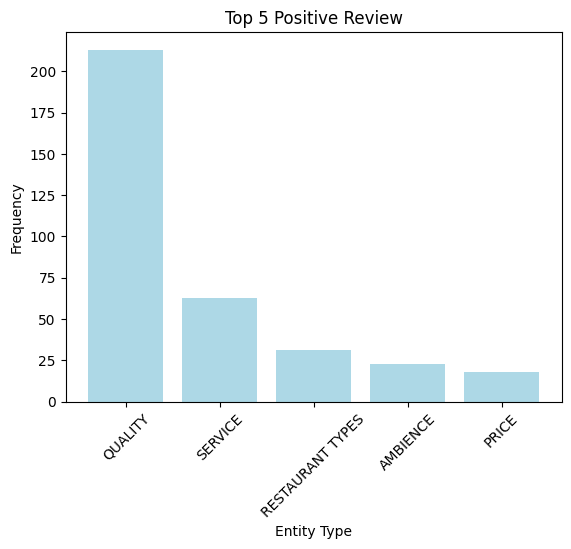

In [56]:
import matplotlib.pyplot as plt

# your results from Part 1
positive_labels = ['QUALITY', 'SERVICE', 'RESTAURANT TYPES', 'AMBIENCE', 'PRICE']
positive_count = [213, 63, 31, 23, 18]

negative_labels = ['QUALITY', 'SERVICE', 'AMBIENCE', 'RESTAURANT', 'RESTAURANT TYPES']
negative_count = [119, 76, 13, 13, 11]


# Positive reviews

plt.bar(positive_labels, positive_count, color='lightblue')
plt.title("Top 5 Positive Review")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

Insights: The above plot of top 5 positive reviews shows that quality and service are the most common positive factors, followed by ambience and restaurant type.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'QUALITY'),
  Text(1, 0, 'SERVICE'),
  Text(2, 0, 'AMBIENCE'),
  Text(3, 0, 'RESTAURANT'),
  Text(4, 0, 'RESTAURANT TYPES')])

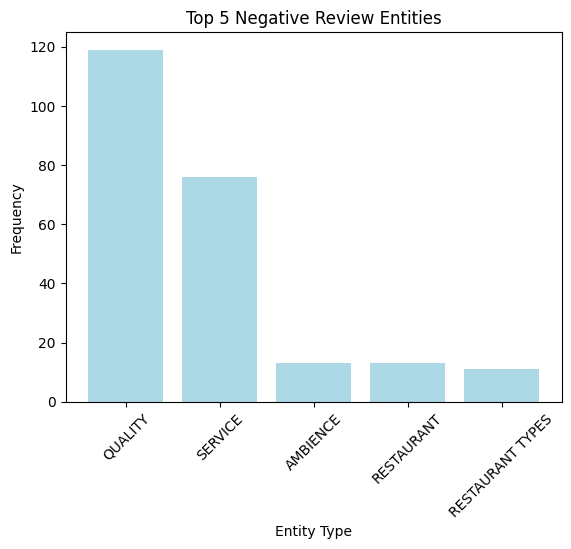

In [57]:
# Negative reviews

plt.bar(negative_labels, negative_count, color='lightblue')
plt.title("Top 5 Negative Review Entities")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

Insights: The above plot of top 5 negative reviews shows that customers complain mostly about food quality and service offred by the restaurant, showing that these two areas affect satisfaction very strongly.

From the visual plotting of top 5 reviews of both positive nad negative reviews , it is evident that Quality and Service matter in both the case of sentiments be it positive or negative.